### Download data from https://www.fueleconomy.gov/feg/epadata/vehicles.csv.zip

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings('ignore')


In [45]:
vehicles = pd.read_csv("vehicles.csv")
vehicles.shape

(42051, 83)

In [3]:
vehicles.replace('',np.nan,inplace = True)

In [4]:
vehicles.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [8]:
vehicles['fuelType1'].value_counts()

Regular Gasoline     28263
Premium Gasoline     12184
Diesel                1198
Electricity            228
Midgrade Gasoline      118
Natural Gas             60
Name: fuelType1, dtype: int64

In [9]:
vehicles.isnull().sum()

barrels08         0
barrelsA08        0
charge120         0
charge240         0
city08            0
              ...  
modifiedOn        0
startStop     31704
phevCity          0
phevHwy           0
phevComb          0
Length: 83, dtype: int64

### Creating a new column based on if-elif-else condition

### 1. 

In [65]:
vehicles['trany2'] = np.where(vehicles['trany'].str[:4]=='Auto', 'Auto', 'Manual')

### 2. 

In [11]:
vehicles.loc[vehicles['trany'].str[:4]=='Auto' , 'trany2'] = 'Auto'
vehicles.loc[vehicles['trany'].str[:4]=='Manu', 'trany2'] = 'Manual'

In [14]:
vehicles.groupby(['year','sCharger']).size()

year  sCharger
1989  S            4
1990  S            4
1991  S            2
1992  S            5
1993  S            5
1994  S            3
1995  S            5
1996  S            6
1997  S            5
1998  S           12
1999  S           12
2000  S           14
2001  S           20
2002  S           26
2003  S           29
2004  S           33
2005  S           30
2006  S           37
2007  S           28
2008  S           35
2009  S           19
2010  S           18
2011  S           25
2012  S           28
2013  S           42
2014  S           65
2015  S           60
2016  S           61
2017  S           63
2018  S           64
2019  S           65
2020  S           45
dtype: int64

## whether there is an overall trend of how MPG changes over time on average?

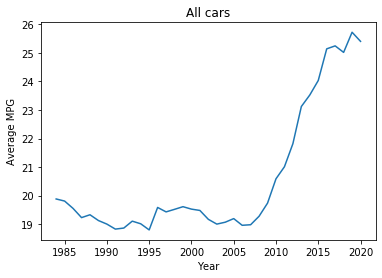

In [18]:
v = vehicles.groupby(['year']).mean()[['comb08','highway08','city08']]
plt.plot(v.index,v.comb08)
plt.xlabel('Year')
plt.ylabel('Average MPG')
plt.title("All cars")
plt.show()

In [66]:
gasCars = vehicles[
    (vehicles['fuelType1'].isin(["Regular Gasoline", "Premium Gasoline", "Midgrade Gasoline"]))
#     & (vehicles['fuelType2'] == "")
    & (vehicles['atvType'] != "Hybrid")
]

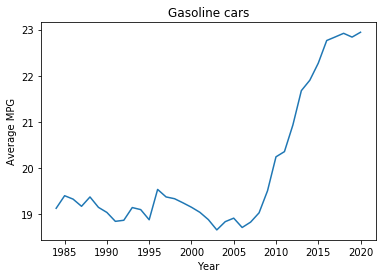

In [33]:
v = gasCars.groupby(['year']).mean()[['comb08','highway08','city08']]
plt.plot(v.index,v.comb08)
plt.xlabel('Year')
plt.ylabel('Average MPG')
plt.title("Gasoline cars")
plt.show()

In [20]:
vehicles.fuelType1.value_counts()

Regular Gasoline     28263
Premium Gasoline     12184
Diesel                1198
Electricity            228
Midgrade Gasoline      118
Natural Gas             60
Name: fuelType1, dtype: int64

### Is there any relation between number of large engine cars have been made and MPG?

### First, let's verify whether cars with larger engines have worse fuel efficiency.

In [46]:
# vehicles.displ.fillna(round(vehicles.displ.mean(),1),inplace=True)

drop index 28604 because it is outlier

In [22]:
vehicles[vehicles.displ==0]

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb,trany2
28604,0.18,0.0,0.0,7.0,126,126.3678,0,0.0,0.0,27.0,...,NaN,0.0,NaN,Fri Feb 06 00:00:00 EST 2015,Mon Sep 26 00:00:00 EDT 2016,N,0,0,0,Auto


In [47]:
vehicles = vehicles.drop(28604)

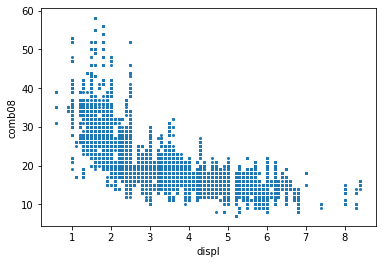

In [51]:
plt.scatter(vehicles.displ,vehicles.comb08,s=4)
plt.xlabel('displ')
plt.ylabel('comb08')
plt.title("")
plt.show()

There is a negative, or even inverse correlation, between engine displacement and fuel efficiency; thus, smaller cars tend to be more fuel-efficient.

### Now, let's see whether more small cars were made in later years, which can explain the drastic increase in fuel efficiency

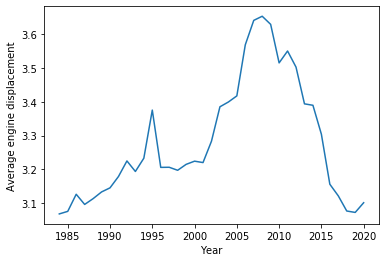

In [62]:
v = gasCars.groupby(['year']).mean()[['displ']]
plt.plot(v.index,v.displ)
plt.xlabel('Year')
plt.ylabel('Average engine displacement')
plt.show()

#### From the preceding figure, the average engine displacement has decreased substantially since 2008.

### Given the trend towards smaller displacement engines, let's see whether automatic or manual transmissions are more efficient for four cylinder engines, and how the efficiencies have changed over time.

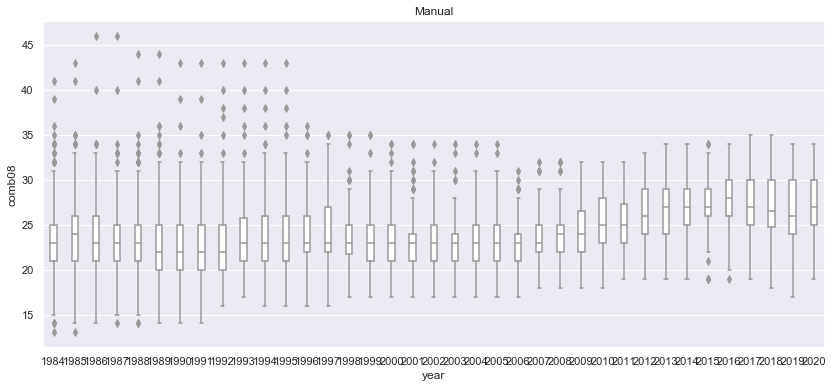

In [99]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.set_color_codes(palette='dark')
gasCars4 = gasCars[(gasCars.cylinders == 4) & (gasCars.trany2=='Manual')]
sns.boxplot(gasCars4.year,gasCars.comb08,width=0.3,ax=ax,color='white')
plt.title("Manual")
plt.show()

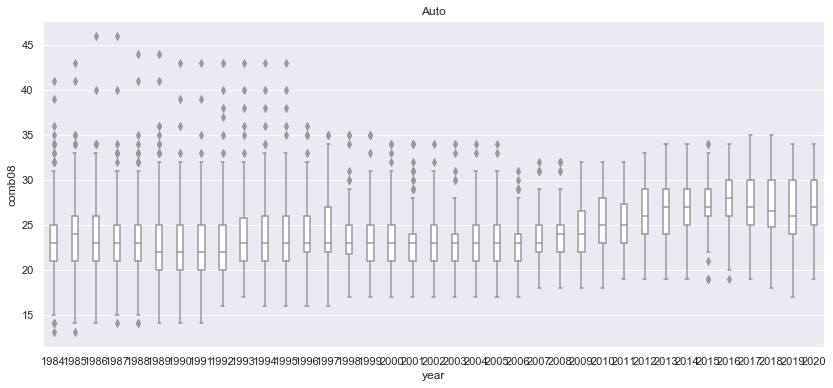

In [100]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(gasCars4.year,gasCars.comb08,width=0.3,ax=ax,color='white')
plt.title("Auto")
plt.show()

## This recipe will investigate the makes and models of automobiles and how they have changed over time

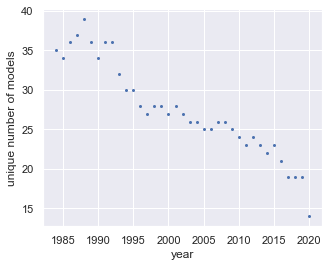

In [113]:
carsMake = gasCars4.groupby('year').make.nunique()
plt.scatter(carsMake.index,carsMake,s=4)
plt.xlabel('year')
plt.ylabel('unique number of models')
plt.title("")
plt.show()

## How have these manufacturers done over time with respect to fuel efficiency?

### We find that there are only 9 manufactures that made four-cylinder cars every year during this period

In [135]:
commonMakes = gasCars4[gasCars4.groupby('make')['year'].transform('nunique') == gasCars4['year'].nunique()].make.unique()
commonMakes

array(['Subaru', 'Toyota', 'Volkswagen', 'Mazda', 'Ford', 'Honda',
       'Chevrolet', 'Nissan', 'Jeep'], dtype=object)

In [131]:
carsCommonMake4 = gasCars4[gasCars4.make.isin(commonMakes)]

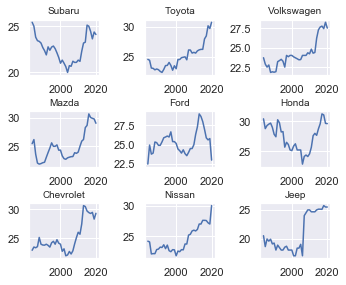

In [157]:
n_row = 3
n_col = math.ceil(len(commonMakes)/3)
fig, axes = plt.subplots(n_row, n_col, subplot_kw=dict())
fig.tight_layout()
for i,m in enumerate(commonMakes):
    r = math.floor(i/3)
    c = i%3
    Y = carsCommonMake4[carsCommonMake4.make == m].groupby("year").mean()['comb08']
    axes[r,c].plot(Y.index,Y)
    axes[r,c].set_title(m, fontsize=10)
plt.show()